# Wine Quality Prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Loading Dataset

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Data shape
data.shape

(1599, 12)

In [4]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2. Description

In [5]:
data['quality'].value_counts()# Data description
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
# Convert 'quality' into binary class
data['quality'] = data['quality'].map(lambda x: 1 if x >= 7 else 0)
data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

### 3. Cleaning Dataset

**Null values inspection**

In [8]:
# Check null values
data.isnull().sum().sort_values(ascending = False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Duplicates inspection**

In [9]:
# Duplicates check
data[data.duplicated(keep = False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0


In [10]:
# Drop duplicates
data.drop_duplicates(keep = 'first', inplace = True)

# Re-check duplicates
data.duplicated().sum()

0

### 4. Data exploration

**Response variable distribution**

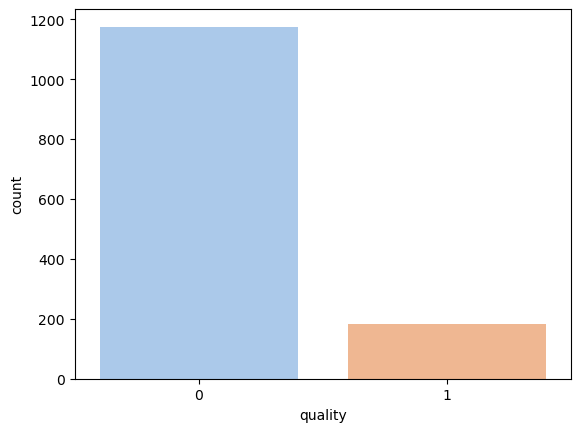

In [11]:
# Target countplot
sns.countplot(x = 'quality', data = data, palette = 'pastel')
plt.show()

In [12]:
# Proportion of quality
data['quality'].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

**Variables distribution**

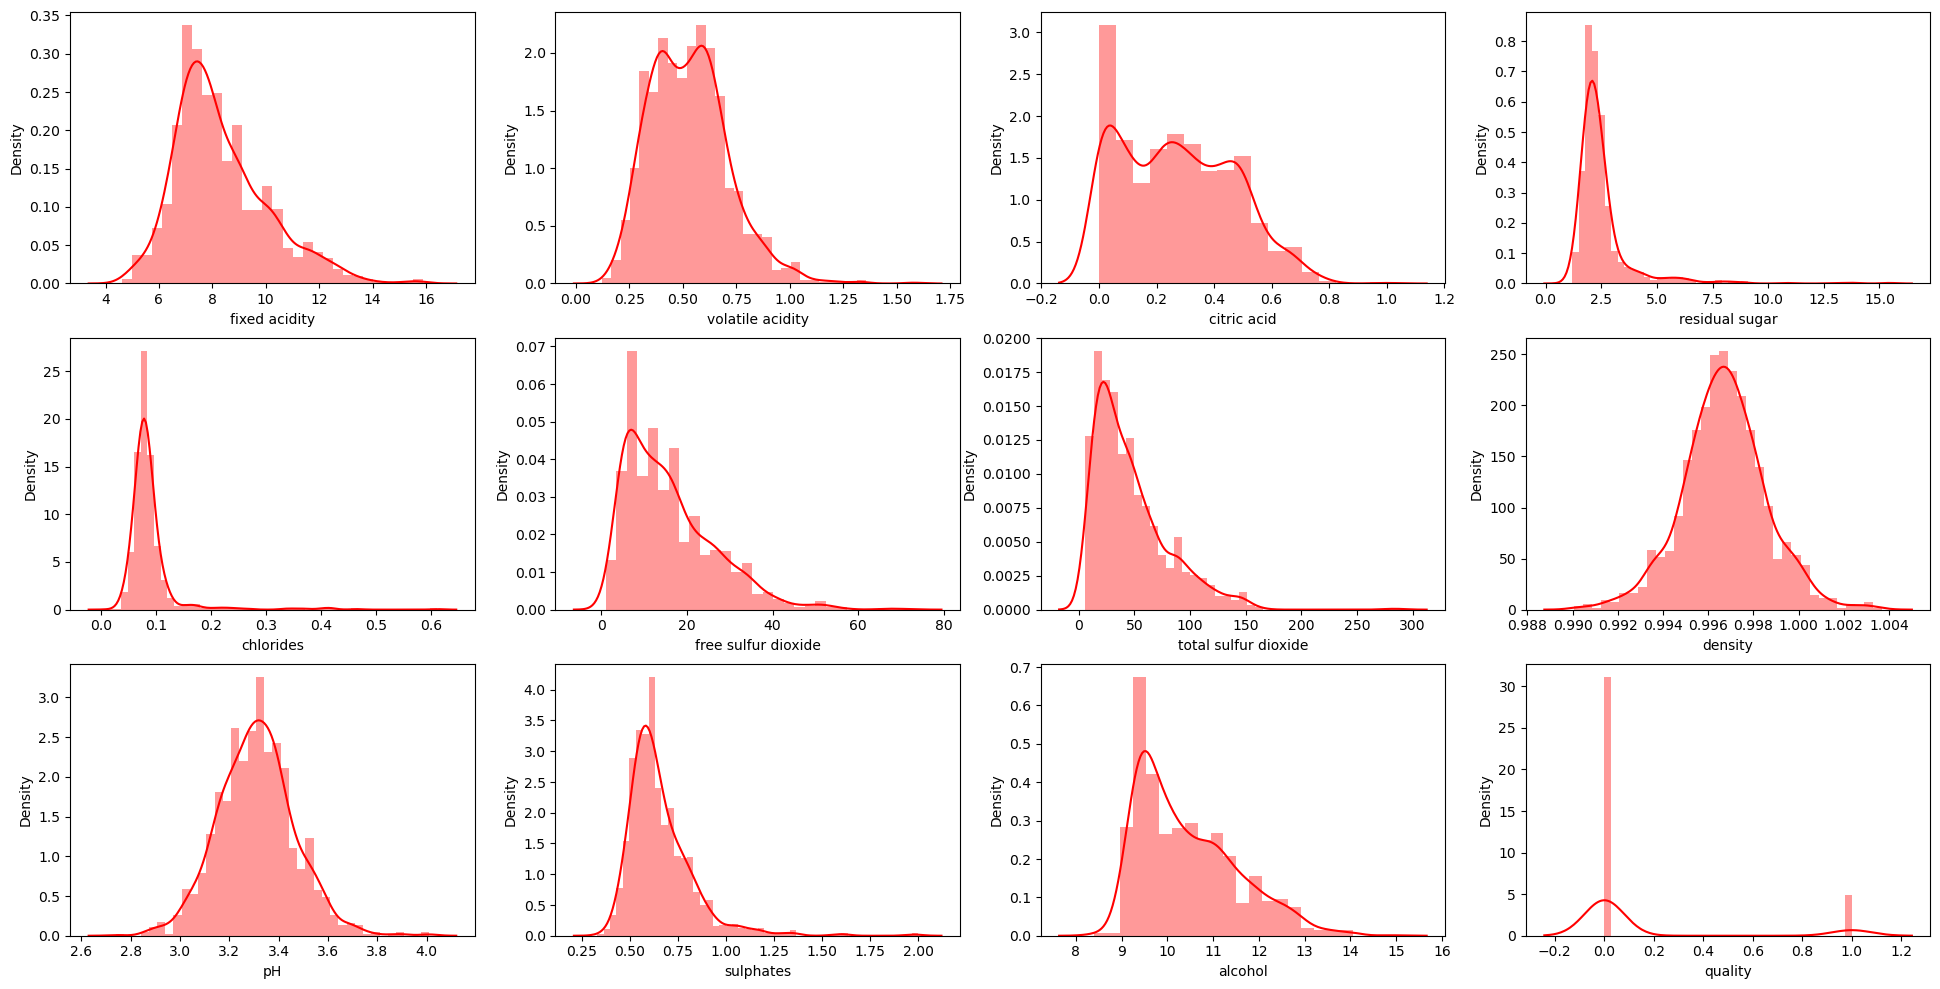

In [13]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3, 4, figsize = (24, 12))
k = 0
columns = list(data.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(data[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

### 5. Pre-processing Data

**Splitting Dataset**

In [14]:
# Split response and predictors
X = data.drop(columns = ['quality'], axis = 1)
y = data['quality']

# Validate the splitting
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (1359, 11)
y shape : (1359,)


In [15]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 73)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (951, 11)
y train shape : (951,)
X test shape  : (408, 11)
y test shape  : (408,)


### 6. Model Exploration

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

# from sklearn.naive_bayes import GaussianNB
 

# #regression
# from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
# from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
# from sklearn.svm import SVR


# #model selection
# from sklearn.model_selection import train_test_split,cross_validate
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

**Baseline model**

In [17]:
# Most frequent class
base_model = y_train.value_counts(normalize = True)
base_model

quality
0    0.864353
1    0.135647
Name: proportion, dtype: float64

In [18]:
print(f"Baseline accuracy score: {base_model[0]:.4f}")

Baseline accuracy score: 0.8644


**Raw data**

In [19]:
models = [('LogisticRegression', LogisticRegression()), 
          ('K Nearest Neighbors', KNeighborsClassifier()), 
          ('Support Vector Machine', SVC()), 
          ('Decision Tree', DecisionTreeClassifier()), 
          ('Random Forest', RandomForestClassifier())]

names = []
accuracy = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    accuracy.append(acc_score)
    names.append(name)

    # print classification report
    print(f'Model: {name}')
    print(classification_report(y_test, y_pred))
    print('=' * 100)

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       353
           1       0.60      0.16      0.26        55

    accuracy                           0.87       408
   macro avg       0.74      0.57      0.59       408
weighted avg       0.84      0.87      0.84       408

Model: K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       353
           1       0.56      0.18      0.27        55

    accuracy                           0.87       408
   macro avg       0.72      0.58      0.60       408
weighted avg       0.84      0.87      0.84       408

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       353
           1       1.00      0.02      0.04        55

    accuracy                           0.87       408
   macro avg       0.93      0.51      0.48  

In [20]:
acc_table = pd.DataFrame({'Models': names, 'Accuracy': accuracy})
acc_table

,Models,Accuracy
0,LogisticRegression,0.872549
1,K Nearest Neighbors,0.870098
2,Support Vector Machine,0.867647
3,Decision Tree,0.818627
4,Random Forest,0.901961


**Standardization**

In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

def scaledTransform(X_train_scaled, X_test_scaled, y_train, y_test, scaler_name):
    models = [('Logistic Regression', LogisticRegression()),
              ('K Nearest Neighbors', KNeighborsClassifier()), 
              ('Support Vector Machine', SVC()), 
              ('Decision Tree', DecisionTreeClassifier()), 
              ('Random Forest', RandomForestClassifier())]
    
    scale_names = []
    scale_acc = []
    
    for name, model in models:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc_score = accuracy_score(y_test, y_pred)
        scale_acc.append(acc_score)
        scale_names.append(name)
    
    acc_table[scaler_name] = np.array(scale_acc)

In [22]:
scalers = [('Acc_MinMaxScaler', MinMaxScaler()),
           ('Acc_StandardScaler', StandardScaler())]

for sc_name, scale in scalers:
    scale.fit(data)
    scaled_data = scale.transform(data)
    X = scaled_data[:, 0:11]
    y = data['quality']
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 73)
    scaledTransform(X_train_scaled, X_test_scaled, y_train, y_test, sc_name)

In [23]:
acc_table

,Models,Accuracy,Acc_MinMaxScaler,Acc_StandardScaler
0,LogisticRegression,0.872549,0.889706,0.911765
1,K Nearest Neighbors,0.870098,0.882353,0.892157
2,Support Vector Machine,0.867647,0.892157,0.897059
3,Decision Tree,0.818627,0.848039,0.845588
4,Random Forest,0.901961,0.899510,0.901961


### 7. Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression**

In [25]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'penalty': ['l1','l2']}

logReg_cv = GridSearchCV(estimator = LogisticRegression(solver = 'liblinear'), param_grid = params, scoring = 'accuracy', cv=10)
logReg_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [26]:
logReg_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [27]:
y_pred_logReg = logReg_cv.predict(X_test_scaled)
accuracy_score(y_test, y_pred_logReg)

0.9019607843137255

**K Nearest Neighbors**

In [28]:
params = {'n_neighbors': np.arange(1, 20),
          'n_jobs': [-1]}

knn_cv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, scoring = 'accuracy', cv = 10)
knn_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

In [29]:
knn_cv.best_params_

{'n_jobs': -1, 'n_neighbors': 8}

In [30]:
y_pred_knn = knn_cv.predict(X_test_scaled)
accuracy_score(y_test, y_pred_knn)

0.8897058823529411

**Support Vector Machine**

In [31]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
          'kernel': ['linear', 'rbf']}

svm_cv = GridSearchCV(estimator = SVC(), param_grid = params, scoring = 'accuracy', cv = 10)
svm_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [32]:
svm_cv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
y_pred_svm = svm_cv.predict(X_test_scaled)
accuracy_score(y_test, y_pred_svm)

0.8921568627450981

**Random Forest**

In [34]:
params = {'n_estimators':[500],
          'max_features':['auto','sqrt','log2']}

rf_cv = GridSearchCV(estimator = RandomForestClassifier(n_jobs = -1), param_grid = params, scoring = 'accuracy', cv = 10)
rf_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [35]:
rf_cv.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [36]:
y_pred_rf = rf_cv.predict(X_test_scaled)
accuracy_score(y_test, y_pred_rf)

0.8995098039215687